In [52]:
import warnings 
warnings.simplefilter("ignore")

In [53]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")

In [54]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [55]:
df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [56]:
df = df.drop(["Channel","Region"],axis = 1)

In [57]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [58]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
X = scaler.fit_transform(df)

In [61]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [62]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters = 2, tol = 0.01, random_state = 0).fit_predict(X)

In [63]:
print (clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [64]:
df["clusters"] = clusters.tolist()

In [65]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


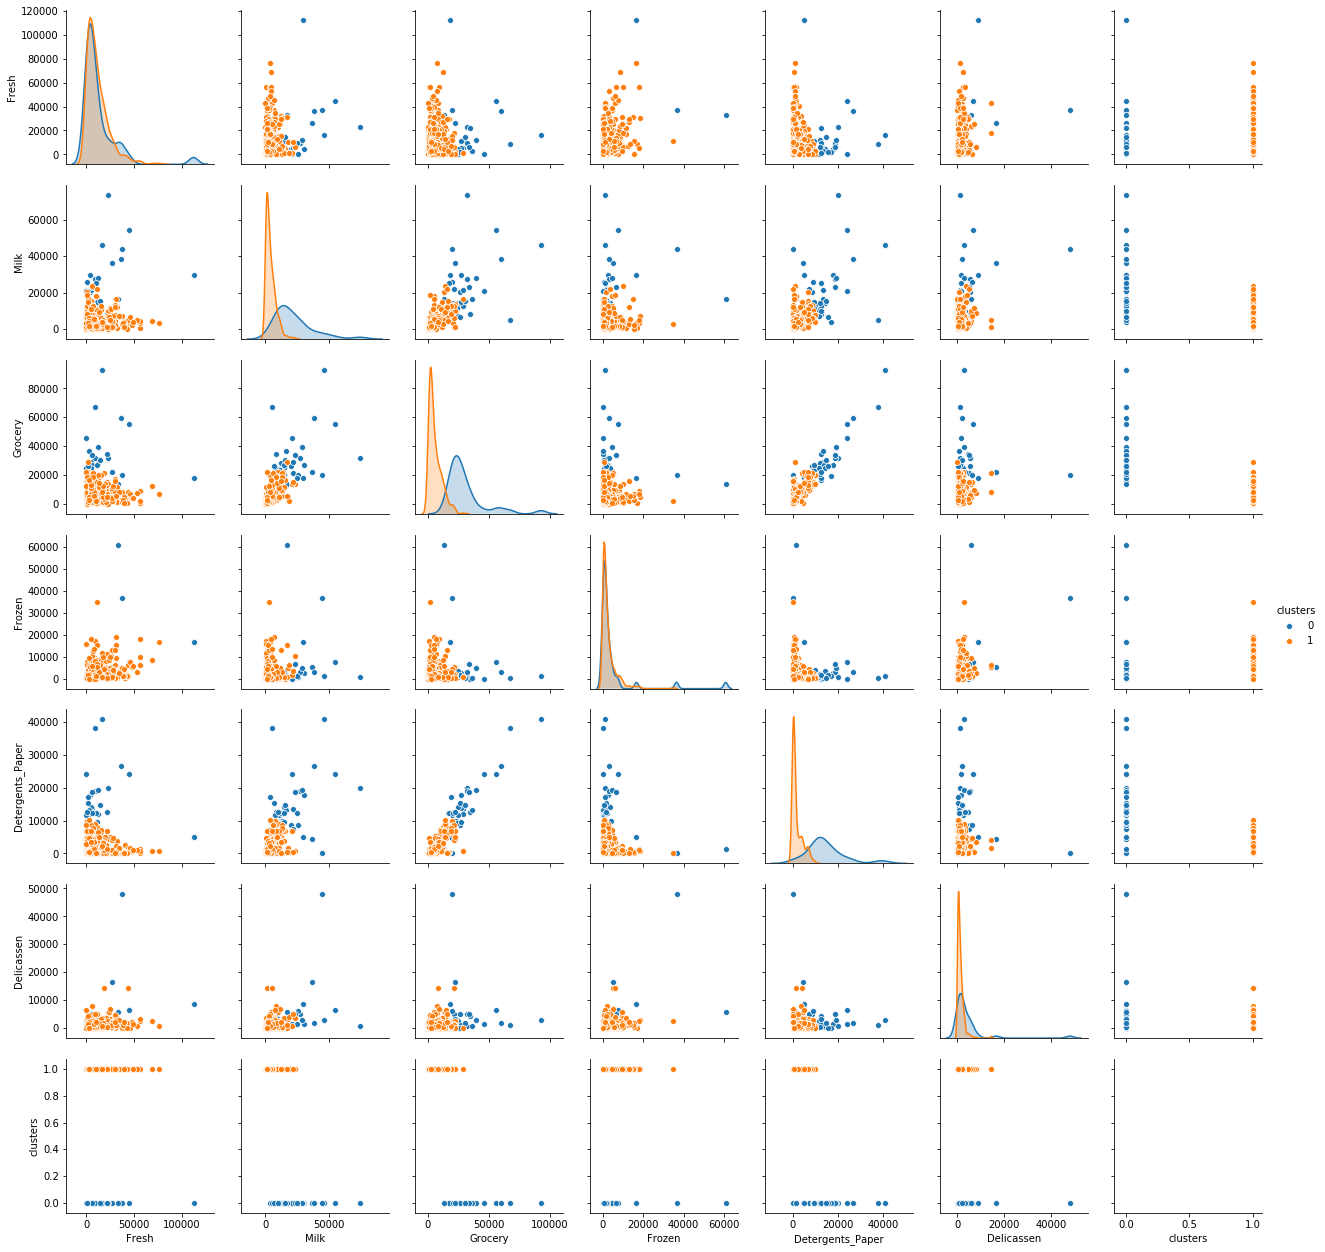

In [67]:
import seaborn as sn
sn.pairplot(df, hue = "clusters")

In [68]:
distortions = []
spread = range(1,26)

for k in spread:
    model = KMeans(n_clusters = k, tol = 0.01, random_state = 0)
    model.fit(X)
    distortions.append(model.inertia_)
    
print (distortions)

    

[2640.0, 1954.6477611552878, 1614.5183504384179, 1317.5042090087509, 1059.2090607997934, 917.913897536389, 832.7806528067342, 742.2687719037792, 655.1889724102246, 605.1682419541655, 567.4564937546725, 516.702721011399, 490.02774461572477, 454.31620373076987, 429.30841119151125, 415.9883199138159, 384.425958225514, 365.90532992196745, 335.23864567915007, 327.4428803637737, 312.0959934484619, 294.61933677400134, 282.6543321561478, 265.8766349468066, 258.8802209055768]


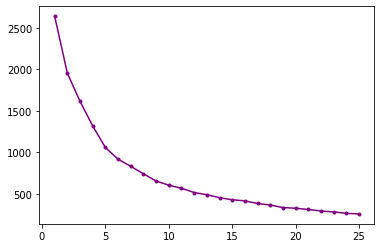

In [70]:
import matplotlib.pyplot as plt
plt.plot(spread, distortions, marker = ".", c = "purple")


In [71]:
clusters = KMeans(n_clusters = 5, tol = 0.01, random_state = 0).fit_predict(X)

In [72]:
df["clusters_agg"] = clusters.tolist()

In [73]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters,clusters_agg
0,12669,9656,7561,214,2674,1338,1,3
1,7057,9810,9568,1762,3293,1776,1,1
2,6353,8808,7684,2405,3516,7844,1,1
3,13265,1196,4221,6404,507,1788,1,3
4,22615,5410,7198,3915,1777,5185,1,0
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0
436,39228,1431,764,4510,93,2346,1,0
437,14531,15488,30243,437,14841,1867,0,1
438,10290,1981,2232,1038,168,2125,1,3


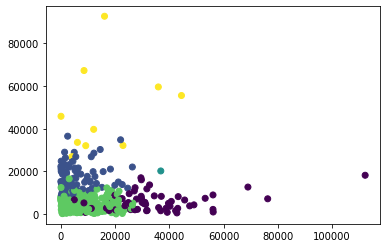

In [74]:
plt.scatter(df["Fresh"],df["Grocery"], c = df.clusters_agg)

In [80]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters = 5, linkage = "ward")
clusters = agg_cluster.fit_predict(X)

In [81]:
df["cluster_aggclus"] = clusters.tolist()

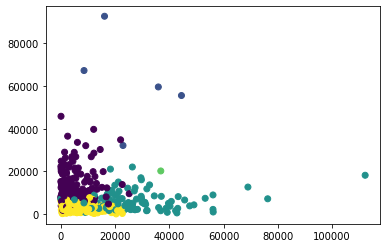

In [83]:
plt.scatter(df["Fresh"],df["Grocery"], c = df.cluster_aggclus)